# Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\awais\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
np.random.seed(0)

data = {
    "FlightID": range(1, 101),
    "Airport": ["Airport_" + str(i % 10 + 1) for i in range(100)],
    "FlightType": np.random.choice(["Incoming", "Outgoing"], size=100, p=[0.6, 0.4]),
    "SatisfactionIndex": ["Satisfied" if i % 3 == 0 else "Dissatisfied" if i % 3 == 1 else "Neutral" for i in range(100)],
    "PassengerCount": [round(100 + (i % 50) * 10 + (i // 10) * 50) for i in range(100)],
    "FlightDuration": np.random.randint(30, 361, size=100),
    "DelayStatus": np.random.choice(['Delayed', 'On Time'], size=100, p=[0.3, 0.7])
}
df = pd.DataFrame(data)

df

,FlightID,Airport,FlightType,SatisfactionIndex,PassengerCount,FlightDuration,DelayStatus
0,1,Airport_1,Incoming,Satisfied,100,155,Delayed
1,2,Airport_2,Outgoing,Dissatisfied,110,288,On Time
2,3,Airport_3,Outgoing,Neutral,120,33,Delayed
3,4,Airport_4,Incoming,Satisfied,130,124,On Time
4,5,Airport_5,Incoming,Dissatisfied,140,256,On Time
...,...,...,...,...,...,...,...
95,96,Airport_6,Incoming,Neutral,1000,118,Delayed
96,97,Airport_7,Incoming,Satisfied,1010,63,On Time
97,98,Airport_8,Incoming,Dissatisfied,1020,163,On Time
98,99,Airport_9,Outgoing,Neutral,1030,262,On Time


# DataFrame

In [5]:
df

,FlightID,Airport,FlightType,SatisfactionIndex,PassengerCount,FlightDuration,DelayStatus
0,1,Airport_1,Incoming,Satisfied,100,155,Delayed
1,2,Airport_2,Outgoing,Dissatisfied,110,288,On Time
2,3,Airport_3,Outgoing,Neutral,120,33,Delayed
3,4,Airport_4,Incoming,Satisfied,130,124,On Time
4,5,Airport_5,Incoming,Dissatisfied,140,256,On Time
...,...,...,...,...,...,...,...
95,96,Airport_6,Incoming,Neutral,1000,118,Delayed
96,97,Airport_7,Incoming,Satisfied,1010,63,On Time
97,98,Airport_8,Incoming,Dissatisfied,1020,163,On Time
98,99,Airport_9,Outgoing,Neutral,1030,262,On Time


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FlightID           100 non-null    int64 
 1   Airport            100 non-null    object
 2   FlightType         100 non-null    object
 3   SatisfactionIndex  100 non-null    object
 4   PassengerCount     100 non-null    int64 
 5   FlightDuration     100 non-null    int32 
 6   DelayStatus        100 non-null    object
dtypes: int32(1), int64(2), object(4)
memory usage: 5.2+ KB


In [15]:
df.describe()

,FlightID,PassengerCount,FlightDuration
count,100.000000,100.000000,100.00000
mean,50.500000,570.000000,202.37000
std,29.011492,249.139935,97.18894
min,1.000000,100.000000,33.00000
25%,25.750000,397.500000,122.50000
50%,50.500000,570.000000,211.00000
75%,75.250000,742.500000,288.25000
max,100.000000,1040.000000,358.00000


In [6]:
total_flight=df['FlightType'].value_counts()

In [7]:
total_flight

Incoming    62
Outgoing    38
Name: FlightType, dtype: int64

In [8]:
satisfaction_counts = df['SatisfactionIndex'].value_counts(normalize=True) * 100
satisfaction_counts

Satisfied       34.0
Dissatisfied    33.0
Neutral         33.0
Name: SatisfactionIndex, dtype: float64

In [9]:
total_passengers = df['PassengerCount'].sum()
average_passengers_per_flight = df['PassengerCount'].mean()
print("\nTotal Passengers:", total_passengers)
print("Average Passengers per Flight:", average_passengers_per_flight)


Total Passengers: 57000
Average Passengers per Flight: 570.0


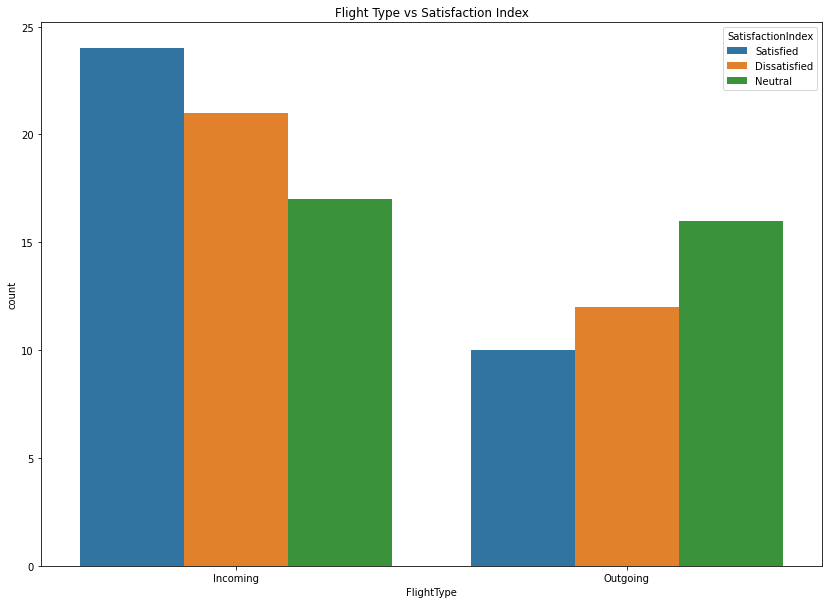

In [10]:
plt.figure(figsize=(14, 10))
sns.countplot(data=df, x='FlightType', hue='SatisfactionIndex')
plt.title('Flight Type vs Satisfaction Index')
plt.show()

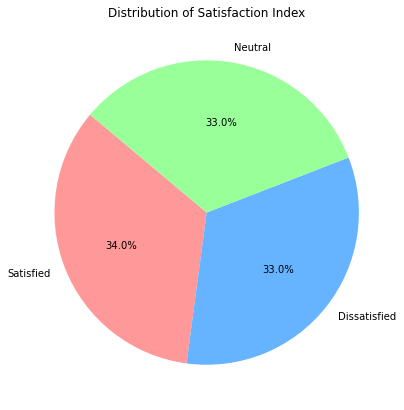

In [11]:
plt.figure(figsize=(7, 7))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Satisfaction Index')
plt.show()

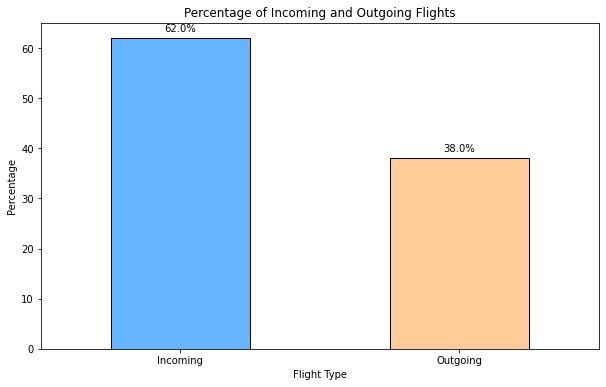

In [12]:
flight_type_counts = df['FlightType'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
flight_type_counts.plot(kind='bar', color=['#66b3ff', '#ffcc99'], edgecolor='black')
plt.title('Percentage of Incoming and Outgoing Flights')
plt.xlabel('Flight Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
for i in range(len(flight_type_counts)):
    plt.text(i, flight_type_counts[i] + 1, f'{flight_type_counts[i]:.1f}%', ha='center', va='bottom')
plt.show()

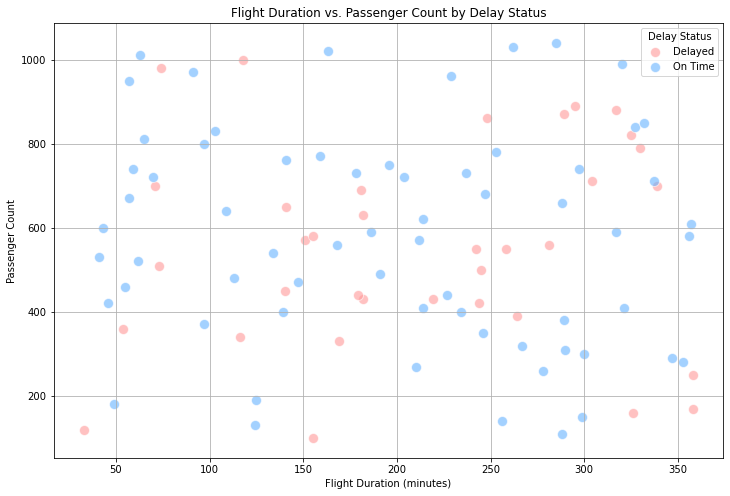

In [13]:

plt.figure(figsize=(12, 8))
colors = {'Delayed': '#ff9999', 'On Time': '#66b3ff'}

for status in colors:
    subset = df[df['DelayStatus'] == status]
    plt.scatter(subset['FlightDuration'], subset['PassengerCount'], 
                c=colors[status], label=status, alpha=0.6, edgecolors='w', s=100)

plt.title('Flight Duration vs. Passenger Count by Delay Status')
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Passenger Count')
plt.legend(title='Delay Status')
plt.grid(True)
plt.show()